In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random

In [2]:

# загрузим библиотеки
# данные библиотеки являются стандартными для пакета Anaconda

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc

from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline 

In [3]:
segment_directory = "data/segmentation.csv"

segment = pd.read_csv(segment_directory, header=0 )


In [4]:
segment.head()

,CustomerId,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
0,8b4f8c66-7589-4734-8ada-2d42f60540ab,100.40,2019-06-04,6,0.35,0.08,0.609740,0.949383
1,2151b2a2-8867-4986-9e00-449c2b4f89e9,170.00,2019-05-25,4,0.66,0.16,0.942272,0.479846
2,3111db79-6721-4ec0-82b1-30b810649c5e,70.75,2019-05-25,6,0.92,0.20,0.323030,0.007076
3,9cb76426-cc5d-4fa3-88bc-b92314b9f4e8,75.00,2019-03-20,10,0.35,0.78,0.876833,0.088974
4,5d86caeb-2d53-44a7-b379-7f15f06ca821,94.51,2019-04-10,5,0.51,0.44,0.912099,0.206194


In [5]:
segment.corr()

,Monetary,Frequency,factor_1,factor_2,factor_3,factor_4
Monetary,1.000000,0.704994,-0.003267,0.000269,-0.004693,0.001962
Frequency,0.704994,1.000000,0.000180,-0.000392,0.006420,0.005112
factor_1,-0.003267,0.000180,1.000000,-0.005630,-0.000411,-0.011337
factor_2,0.000269,-0.000392,-0.005630,1.000000,0.006977,0.011048
factor_3,-0.004693,0.006420,-0.000411,0.006977,1.000000,-0.003524
factor_4,0.001962,0.005112,-0.011337,0.011048,-0.003524,1.000000


In [6]:
segment.describe()

,Monetary,Frequency,factor_1,factor_2,factor_3,factor_4
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,129.972264,3.950687,0.500008,0.497864,0.495451,0.498427
std,179.809263,5.189864,0.290144,0.291103,0.289034,0.288478
min,0.000000,1.000000,0.000000,0.000000,0.000037,0.000033
25%,20.910000,1.000000,0.250000,0.240000,0.242545,0.248739
50%,59.275000,2.000000,0.500000,0.500000,0.496410,0.498833
75%,170.000000,5.000000,0.750000,0.750000,0.744476,0.747424
max,3040.000000,111.000000,1.000000,1.000000,0.999996,0.999943


/home/avikharev/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


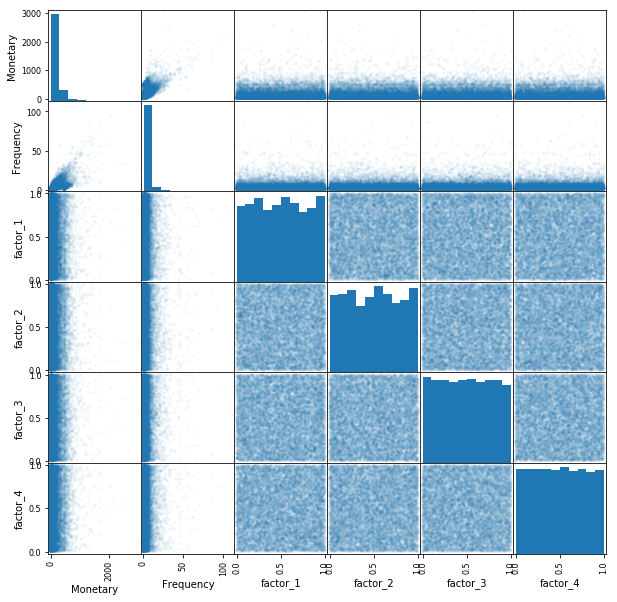

In [7]:


# построим диаграммы рассеивания и гистограммы для столбцов
from pandas.tools.plotting import scatter_matrix
scatter_matrix(segment, alpha=0.05, figsize=(10, 10));



In [8]:
# pca = PCA(n_components=3)
# pca_result = pca.fit_transform(segment[['Monetary' ,'Frequency'
#                                        ,'factor_1' ,'factor_3' , 'factor_4']].values)
# segment['pca-one'] = pca_result[:,0]
# segment['pca-two'] = pca_result[:,1] 
# segment['pca-three'] = pca_result[:,2]
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [9]:


# # Изменяя названия столбцов можно построить диаграммы рассеиванию двух параметров
# # Замените названия стобцов col1 и col2
# col1 = 'factor_1'
# col2 = 'factor_4'

# plt.figure(figsize=(10, 6))

# plt.scatter(segment[col1],
#             segment[col2],
#             alpha=0.75,
#             color='red')
# plt.xlabel(col1)
# plt.ylabel(col2)



In [10]:
# rndperm = list(range(1,1000))

# ax = plt.figure(figsize=(16,10)).gca(projection='3d')
# ax.scatter(
#     xs=segment.loc[rndperm,:]["pca-one"], 
#     ys=segment.loc[rndperm,:]["pca-two"], 
#     zs=segment.loc[rndperm,:]["pca-three"], 
    
#     cmap='tab10'
# )
# ax.set_xlabel('pca-one')
# ax.set_ylabel('pca-two')
# ax.set_zlabel('pca-three')
# plt.show()

In [23]:
segment.shape

(16000, 7)

In [26]:

#готовим данные
# Выделим данные, начиная с первой колонки
# Это то, что подлежит анализу
# данную операцию надо проделывать на рядах с названием строк
# следующая команда удаляет столбец Recency, он не содержаит данных ядл кластеризации

data_for_clust = segment.drop([0,2], axis = 1, inplace = True).values



AttributeError: 'numpy.ndarray' object has no attribute 'pop'

In [25]:
from sklearn import preprocessing
dataNorm = preprocessing.scale(data_for_clust)

NameError: name 'data_for_clust' is not defined

In [ ]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведен данные к нормальным значениям
from sklearn import preprocessing
dataNorm = preprocessing.scale(data_for_clust)


In [ ]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

In [ ]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("clusters:", k)


In [ ]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
#
# указываем количество кластеров!
#
nCluster=6

#строим дендрограмму 
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nCluster, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [ ]:
# строим кластеризаци методом KMeans
#
# n_clusters - укажите количество кластеров, которые вам необходимы
#
km = KMeans(n_clusters=6).fit(dataNorm)

In [ ]:


# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1
km.labels_ +1



In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(data_for_clust[:,0], data_for_clust[:,2], c=km.labels_, cmap='flag')
plt.show()

In [ ]:


# к оригинальным данным добавляем номера кластеров
dataK=segment
dataK['group_no']=clusters

writer = pd.ExcelWriter('result.xlsx')
dataK.to_excel(writer,'KMeans')
writer.save()

